# Advance Regression Assignment

In [1010]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [1011]:
# Reading csv file and creating data frame
housing_df = pd.read_csv('E:\\UPGRAD-study\\Nikita\\Assignment\\Advance Regression Assignment\\train.csv')

In [1012]:
housing_df.head() # Looking at the top 5 rows of the housing df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1013]:
housing_df.info() # Looking at the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1014]:
housing_df.shape # 1460 row and 81 columns

(1460, 81)

In [1015]:
housing_df.describe() # Describing the numeric columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1016]:
housing_df.select_dtypes(['int64','float64']).head() # Looking at the numerical columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [1017]:
housing_df.select_dtypes(['object']) # Looking at the categorical columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1018]:
list(housing_df.columns) # Looking at the columns of the dataset

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

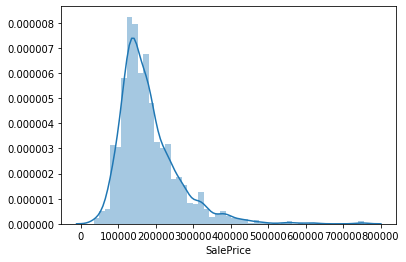

In [1019]:
# Plotting y variable
sns.distplot(housing_df['SalePrice'])
plt.show()

In [1020]:
housing_df['SalePrice'].skew() # checking skewness of the curve

1.8828757597682129

In [1021]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice']) # Transforming target variable as it is not in a normalise form

In [1022]:
housing_df['SalePrice'].skew() # Checking skewness after transformation

0.12133506220520406

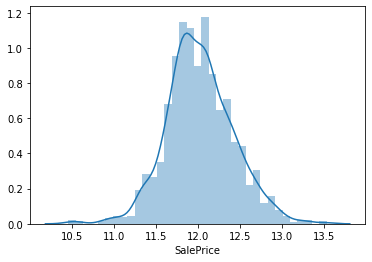

In [1023]:
# Looking at the curve after transformation to check whether the data is now normally distributed or not
sns.distplot(housing_df['SalePrice'])
plt.show()

In [1024]:
# Checking for null values
(housing_df.isnull().sum()/housing_df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1025]:
# Checking for the null values which contribute more than 50 %
columns_name = list(housing_df.columns[(housing_df.isnull().sum()/housing_df.shape[0])*100 >50])
columns_name

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [1026]:
housing_df.Alley.value_counts(dropna = False)  # Looking at the values in the columns more than 50% null

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [1027]:
housing_df.PoolQC.value_counts(dropna = False) # Looking at the values in the columns more than 50% null

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [1028]:
housing_df.Fence.value_counts() # Looking at the values in the columns more than 50% null

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1029]:
housing_df.MiscFeature.value_counts(dropna = False) # Looking at the values in the columns more than 50% null

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [1030]:
# Treating the missing values in the dataset
More_than_0 = list(housing_df.columns[(housing_df.isnull().sum()/housing_df.shape[0])*100 >0])
More_than_0

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1031]:
housing_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [1032]:
housing_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [1033]:
# Looking the null values fter imputation
(housing_df.isnull().sum()/housing_df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1034]:
# Imputing missing values with mean for numeric columns and mode for categorical one's
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean())
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna(housing_df.MasVnrType.mode()[0])
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df.MasVnrArea.mean())
housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df.Electrical.mode()[0])
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(housing_df.GarageYrBlt.mean())

In [1035]:
# Creating list of categorical columns
object_type = housing_df.select_dtypes(['object'])
print(object_type.columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [1036]:
# Printing value counts for each columns
for c in object_type.columns:
    print("----------- %s ---------"% c)
    print(object_type[c].value_counts(dropna = False))

----------- MSZoning ---------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------- Street ---------
Pave    1454
Grvl       6
Name: Street, dtype: int64
----------- Alley ---------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
----------- LotShape ---------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------- LandContour ---------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
----------- Utilities ---------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
----------- LotConfig ---------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
----------- LandSlope ---------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
----------- Neighborhood ---------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt   

In [1037]:
# Mapping columns with 0 and 1
housing_df['Street'] = housing_df['Street'].map({'Pave':1,'Grvl':0})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':1,'NoSeWa':0})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'Y':1,'N':0})

# Filling null values with actul values
housing_df['Alley'].fillna('No Alley',inplace=True)
housing_df['PoolQC'].fillna('No PoolQc',inplace=True)
housing_df['Fence'].fillna('No Fence',inplace=True)
housing_df['MiscFeature'].fillna('No MiscFeature',inplace=True)
housing_df['GarageType'].fillna('No Garage',inplace=True)

housing_df['GarageQual'].fillna('No Garage',inplace=True)
housing_df['BsmtQual'].fillna('No Base',inplace=True)
housing_df['BsmtCond'].fillna('No Basement',inplace=True)
housing_df['BsmtExposure'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType1'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType2'].fillna('No Basement',inplace=True)
housing_df['FireplaceQu'].fillna('No Fire',inplace=True)
housing_df['GarageFinish'].fillna('No Garage',inplace=True)
housing_df['GarageCond'].fillna('No Garage',inplace=True)


# Mapping Oridinal columns with 0,1,,2,3,4.. accordingly
housing_df['Alley'] = housing_df['Alley'].map({'No Alley':0,'Grvl':1,'Pave':2})
housing_df['PoolQC'] = housing_df['PoolQC'].map({'No PoolQc':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['Fence'] = housing_df['Fence'].map({'No Fence':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
housing_df['LotShape'] = housing_df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'TA':0,'Gd':1,'Fa':2,'Ex':3,'Po':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3,'No Base' : 4})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'TA':0,'Gd':1,'Fa':2,'Po':3,'No Basement':4})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'No':0,'Av':1,'Gd':2,'Mn':3,'No Basement':4})
housing_df['Electrical'] = housing_df['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Unf':0,'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'No Basement':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Unf':0,'Rec':1,'LwQ':2,'BLQ':3,'ALQ':4,'GLQ':5,'No Basement':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Ex':0,'TA':1,'Gd':2,'Fa':3,'Po':4})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'TA':0,'Gd':1,'Ex':2,'Fa':3})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Gd':0,'TA':1,'Fa':2,'Ex':3,'Po':4,'No Fire':5})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Unf':0,'RFn':1,'Fin':2,'No Garage':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'TA':0,'Fa':1,'Gd':2,'Ex':3,'Po':4,'No Garage':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'TA':0,'Fa':1,'Gd':2,'Po':3,'Ex':4,'No Garage':5})
housing_df['PavedDrive'] = housing_df['PavedDrive'].map({'Y':0,'N':1,'P':2})


In [1038]:
housing_df[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


In [1039]:
# Fetching the Current Year 
import datetime
Current_Year = datetime.datetime.now().year

# finding age of the property, property after reconstruction and garage 
housing_df['Property_Age'] = Current_Year - housing_df['YearBuilt']
housing_df['Age_after_Recontruction'] = Current_Year - housing_df['YearRemodAdd']
housing_df['Age_of_Garage'] = Current_Year - housing_df['GarageYrBlt']

# Looking at the month after which the property got sold
# housing_df['Month_took_for_sale'] = (housing_df['YrSold'] - housing_df['YearBuilt'])*12 - housing_df['MoSold']
housing_df.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],axis =1 , inplace=True)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Property_Age,Age_after_Recontruction,Age_of_Garage
0,60,RL,65.0,8450,1,0,0,Lvl,1,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,1,0,PConc,1,0,0,1,706,0,0,150,856,GasA,0,1,0,856,854,0,1710,1,0,2,1,3,1,1,8,Typ,0,5,Attchd,1,2,548,0,0,0,0,61,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.247694,16,16,16.0
1,20,RL,80.0,9600,1,0,0,Lvl,1,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,0,CBlock,1,0,2,2,978,0,0,284,1262,GasA,0,1,0,1262,0,0,1262,0,1,2,0,3,1,0,6,Typ,1,1,Attchd,1,2,460,0,0,0,298,0,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.109011,43,43,43.0
2,60,RL,68.0,11250,1,0,1,Lvl,1,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,1,0,PConc,1,0,3,1,486,0,0,434,920,GasA,0,1,0,920,866,0,1786,1,0,2,1,3,1,1,6,Typ,1,1,Attchd,1,2,608,0,0,0,0,42,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.317167,18,17,18.0
3,70,RL,60.0,9550,1,0,1,Lvl,1,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,0,BrkTil,0,1,0,2,216,0,0,540,756,GasA,2,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,Typ,1,0,Detchd,0,3,642,0,0,0,0,35,272,0,0,0,0,0,No MiscFeature,0,WD,Abnorml,11.849398,104,49,21.0
4,60,RL,84.0,14260,1,0,1,Lvl,1,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,1,0,PConc,1,0,1,1,655,0,0,490,1145,GasA,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,Typ,1,1,Attchd,1,3,836,0,0,0,192,84,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.429216,19,19,19.0


In [1040]:
# Looking at the head for checking whether the mapping is done or not
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Property_Age,Age_after_Recontruction,Age_of_Garage
0,60,RL,65.0,8450,1,0,0,Lvl,1,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,1,0,PConc,1,0,0,1,706,0,0,150,856,GasA,0,1,0,856,854,0,1710,1,0,2,1,3,1,1,8,Typ,0,5,Attchd,1,2,548,0,0,0,0,61,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.247694,16,16,16.0
1,20,RL,80.0,9600,1,0,0,Lvl,1,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,0,CBlock,1,0,2,2,978,0,0,284,1262,GasA,0,1,0,1262,0,0,1262,0,1,2,0,3,1,0,6,Typ,1,1,Attchd,1,2,460,0,0,0,298,0,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.109011,43,43,43.0
2,60,RL,68.0,11250,1,0,1,Lvl,1,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,1,0,PConc,1,0,3,1,486,0,0,434,920,GasA,0,1,0,920,866,0,1786,1,0,2,1,3,1,1,6,Typ,1,1,Attchd,1,2,608,0,0,0,0,42,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.317167,18,17,18.0
3,70,RL,60.0,9550,1,0,1,Lvl,1,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,0,BrkTil,0,1,0,2,216,0,0,540,756,GasA,2,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,Typ,1,0,Detchd,0,3,642,0,0,0,0,35,272,0,0,0,0,0,No MiscFeature,0,WD,Abnorml,11.849398,104,49,21.0
4,60,RL,84.0,14260,1,0,1,Lvl,1,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,1,0,PConc,1,0,1,1,655,0,0,490,1145,GasA,0,1,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,Typ,1,1,Attchd,1,3,836,0,0,0,192,84,0,0,0,0,0,0,No MiscFeature,0,WD,Normal,12.429216,19,19,19.0


In [1041]:
# Creating list of categorical varibles to create dummies
obj_col = housing_df.select_dtypes(['object']).columns
len(obj_col)

20

In [1042]:
# Creating dummies
df = pd.get_dummies(housing_df[obj_col],drop_first=True,prefix=obj_col)

In [1043]:
df.head() # Looking at dataset after creating dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0

In [1044]:
housing_df.drop(obj_col,axis=1,inplace=True) # Dropping original variables

In [1045]:
# Concating housing_df with the dummmies dataframe i.e. df
housing_df = pd.concat([housing_df,df],axis = 1)
housing_df.shape

(1460, 202)

In [1046]:
housing_df.select_dtypes(['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice',
       'Property_Age', 'Age_after_Recontruction', 'Age_of_Garage'],
      dtype='object')

In [1047]:
# scaling the variables
from sklearn.preprocessing import StandardScaler

# creating object of scaler
scaler = StandardScaler()
numeric_columns = housing_df.select_dtypes(['int64','float64']).columns
housing_df[numeric_columns] = scaler.fit_transform(housing_df[numeric_columns])

In [1048]:
housing_df.head() # Looking at the head of the dataset after scaling

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SalePrice,Property_Age,Age_after_Recontruction,Age_of_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.064238,-0.243025,-0.701291,0.02618,-0.225716,0.651479,-0.517200,0.511418,0.924558,-0.342856,0.266579,-0.287791,-0.618671,-0.404367,0.575425,-0.338193,-0.288653,-0.944591,-0.459303,-0.845742,0.263813,-0.279513,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.522455,0.912210,-0.951226,1.011397,0.066689,0.311725,0.351000,-0.291494,-0.282982,-0.28142,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.063796,-0.469867,-0.087688,0.560068,-1.050994,-0.878668,-1.021157,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,

In [1049]:
housing_df.isnull().sum() # Checking for null values fter scaling

MSSubClass                    0
LotFrontage                   0
LotArea                       0
Street                        0
Alley                         0
LotShape                      0
Utilities                     0
LandSlope                     0
OverallQual                   0
OverallCond                   0
MasVnrArea                    0
ExterQual                     0
ExterCond                     0
BsmtQual                      0
BsmtCond                      0
BsmtExposure                  0
BsmtFinType1                  0
BsmtFinSF1                    0
BsmtFinType2                  0
BsmtFinSF2                    0
BsmtUnfSF                     0
TotalBsmtSF                   0
HeatingQC                     0
CentralAir                    0
Electrical                    0
1stFlrSF                      0
2ndFlrSF                      0
LowQualFinSF                  0
GrLivArea                     0
BsmtFullBath                  0
BsmtHalfBath                  0
FullBath

In [1050]:
# X - Y Split
y = housing_df.pop('SalePrice')
y.shape

(1460,)

In [1051]:
X = housing_df
X.shape

(1460, 201)

### Train - Test Split

In [1052]:
from sklearn.model_selection import train_test_split

In [1053]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.7,test_size = 0.3,random_state = 100 )

In [1054]:
X_train.shape

(1021, 201)

In [1055]:
X_test.shape

(438, 201)

In [1056]:
y_test.shape

(438,)

In [1057]:
y_train.shape

(1021,)

In [1058]:
y_test.head()

1436   -0.813007
57      0.411622
780     0.135703
382     0.619414
1170    0.063529
Name: SalePrice, dtype: float64

In [1059]:
y_train.head()

210    -1.330599
318     1.112871
239    -0.973937
986    -0.886823
1416   -0.771783
Name: SalePrice, dtype: float64

In [1060]:
X_train.isnull().sum()

MSSubClass                    0
LotFrontage                   0
LotArea                       0
Street                        0
Alley                         0
LotShape                      0
Utilities                     0
LandSlope                     0
OverallQual                   0
OverallCond                   0
MasVnrArea                    0
ExterQual                     0
ExterCond                     0
BsmtQual                      0
BsmtCond                      0
BsmtExposure                  0
BsmtFinType1                  0
BsmtFinSF1                    0
BsmtFinType2                  0
BsmtFinSF2                    0
BsmtUnfSF                     0
TotalBsmtSF                   0
HeatingQC                     0
CentralAir                    0
Electrical                    0
1stFlrSF                      0
2ndFlrSF                      0
LowQualFinSF                  0
GrLivArea                     0
BsmtFullBath                  0
BsmtHalfBath                  0
FullBath

In [1061]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,Property_Age,Age_after_Recontruction,Age_of_Garage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,MiscFeature_No MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.872563,-0.456474,-0.152020,0.064238,-0.243025,-0.701291,0.02618,-0.225716,-1.518467,0.381743,-0.574410,-0.709648,-0.342856,-0.855049,-0.287791,-0.618671,0.206788,0.378031,-0.338193,-0.288653,-0.722728,-0.441061,0.318050,0.263813,-0.279513,-0.772733,-0.795163,-0.120242,-1.240174,-0.819964,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.846997,-0.934130,-0.951226,1.011397,-1.003266,0.311725,0.257425,-0.291494,-0.282982,-0.28142,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.063796,1.191165,-0.087688,0.008870,0.671845,0.187864,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0

#### Model Building and Evaluation

In [1062]:
# Importing libraries for performing model building 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge and Lasso Regression

### Ridge Regression

In [1063]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                   3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
         }
ridge = Ridge()
# cross validation
folds = 6
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    2.3s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1064]:
# Creaing dataframe to save cross validation result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.005434,0.005989,0.008133,0.007496,0.0001,{'alpha': 0.0001},-0.208990,-0.311147,-0.238292,-0.301023,-0.214655,-0.220627,-0.249083,0.041368,14,-0.151060,-0.147785,-0.152370,-0.151480,-0.153268,-0.148146,-0.150685,0.002047
1,0.007800,0.007800,0.007800,0.007800,0.001,{'alpha': 0.001},-0.211799,-0.309902,-0.238290,-0.300004,-0.214378,-0.220280,-0.249072,0.040479,13,-0.151433,-0.147811,-0.152390,-0.151533,-0.153385,-0.148244,-0.150799,0.002066
2,0.011867,0.005523,0.001500,0.001118,0.01,{'alpha': 0.01},-0.303864,-0.299910,-0.238311,-0.292236,-0.212494,-0.217818,-0.260814,0.038861,23,-0.154072,-0.148600,-0.152568,-0.152400,-0.155030,-0.150304,-0.152162,0.002169
3,0.010034,0.005350,0.001333,0.001491,0.05,{'alpha': 0.05},-0.372008,-0.283407,-0.238622,-0.278286,-0.211655,-0.220384,-0.267496,0.054023,27,-0.157592,-0.154152,-0.153298,-0.159075,-0.163788,-0.159814,-0.157953,0.003536
4,0.007800,0.007800,0.002600,0.005814,0.1,{'alpha': 0.1},-0.379721,-0.275039,-0.238850,-0.272410,-0.212321,-0.226199,-0.267533,0.055230,28,-0.159483,-0.159289,-0.154100,-0.164795,-0.170616,-0.166690,-0.162495,0.005457


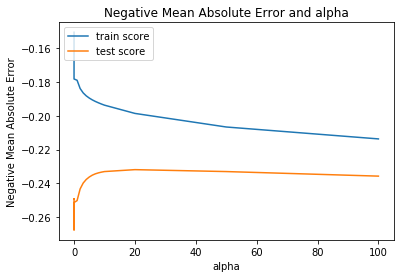

In [1065]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1066]:
model_cv.best_params_

{'alpha': 20}

In [1067]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.28203048e-02, -2.04673978e-02,  3.69940788e-02,  2.38905301e-02,
        8.92335851e-03, -5.80643165e-03,  1.23847323e-02,  2.23288629e-02,
        2.20149807e-01,  1.05419229e-01,  1.67331794e-03,  1.17083651e-02,
       -8.43190962e-03,  3.33817793e-02, -4.08775523e-02,  2.69822581e-02,
        6.19331100e-03,  2.38019260e-02, -2.11741267e-02,  1.42597506e-02,
       -4.11733709e-03,  2.58421081e-02, -9.18938168e-03,  3.44753411e-02,
       -2.59342630e-03,  8.86843523e-02,  1.02186041e-01,  8.87535021e-03,
        1.50953195e-01,  8.61405441e-02,  1.70463501e-02,  4.34109024e-02,
        1.72309663e-02,  2.11251812e-02, -3.27276423e-02,  2.16836373e-02,
        4.99386463e-02,  1.80989926e-02, -4.30300964e-02,  3.31525655e-02,
        1.12015537e-01,  1.80202054e-02,  2.67063675e-02, -3.08359983e-02,
        1.99812159e-03,  3.34593286e-02, -1.87179553e-03,  2.40009273e-02,
        1.76968060e-02,  3.02843425e-02, -1.66395403e-02, -3.35158605e-02,
       -2.92630889e-03, -

### Lasso

In [1068]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    3.5s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [1069]:
model_cv.best_params_

{'alpha': 0.01}

In [1070]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.095501,0.032797,0.000333,0.000745,0.0001,{'alpha': 0.0001},-0.308100,-0.283242,-0.231362,-0.281923,-0.202698,-0.211866,-0.253252,0.039761,3,-0.158675,-0.151184,-0.155557,-0.154638,-0.157553,-0.153976,-0.155264,0.002438
1,0.096533,0.027617,0.000000,0.000000,0.001,{'alpha': 0.001},-0.355687,-0.247557,-0.232684,-0.236405,-0.198515,-0.213319,-0.247467,0.051102,2,-0.182025,-0.186069,-0.169614,-0.189767,-0.196906,-0.196051,-0.186739,0.009266
2,0.016701,0.000998,0.004100,0.005156,0.01,{'alpha': 0.01},-0.242972,-0.253828,-0.251914,-0.243928,-0.230879,-0.241413,-0.244154,0.007513,1,-0.234153,-0.228208,-0.209564,-0.226193,-0.236260,-0.230895,-0.227546,0.008722
3,0.012233,0.005723,0.002933,0.005712,0.05,{'alpha': 0.05},-0.252104,-0.271951,-0.283129,-0.267944,-0.281142,-0.269247,-0.270901,0.010180,4,-0.266968,-0.265340,-0.241259,-0.257628,-0.271430,-0.268107,-0.261789,0.010092
4,0.010400,0.007354,0.002600,0.005814,0.1,{'alpha': 0.1},-0.279350,-0.309981,-0.308155,-0.293170,-0.320228,-0.303522,-0.302379,0.013091,5,-0.305232,-0.300437,-0.274110,-0.294868,-0.301968,-0.304850,-0.296911,0.010757


In [1071]:
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    3.2s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

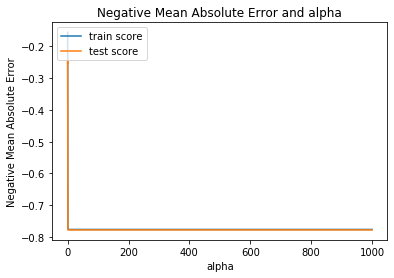

In [1072]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1076]:
alpha =0.02
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1074]:
lasso.coef_

array([-0.04573983,  0.        ,  0.0318119 ,  0.01178479, -0.        ,
        0.        ,  0.        ,  0.00960636,  0.29410839,  0.07967333,
        0.        ,  0.        , -0.        ,  0.        , -0.01609366,
        0.00908893,  0.        ,  0.01455097, -0.        ,  0.        ,
       -0.        ,  0.04380424, -0.00571885,  0.03694593, -0.        ,
        0.01863222,  0.        , -0.        ,  0.25641326,  0.07671108,
        0.        ,  0.0297485 ,  0.        ,  0.        , -0.00940961,
        0.01413828,  0.02157421,  0.02934745, -0.04914687,  0.01478581,
        0.12327256,  0.01306636, -0.        , -0.        , -0.        ,
        0.02589603,  0.        ,  0.        ,  0.        ,  0.0125665 ,
       -0.        , -0.04573238, -0.        , -0.        , -0.14759111,
       -0.06868078, -0.        ,  0.        ,  0.        ,  0.00956199,
       -0.04299812,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [1075]:
pd.Series(lasso.coef_,index=X.columns).sort_values(ascending=False)

OverallQual                   0.294108
GrLivArea                     0.256413
GarageCars                    0.123273
OverallCond                   0.079673
BsmtFullBath                  0.076711
TotalBsmtSF                   0.043804
CentralAir                    0.036946
LotArea                       0.031812
FullBath                      0.029748
Fireplaces                    0.029347
WoodDeckSF                    0.025896
GarageType_Attchd             0.023078
TotRmsAbvGrd                  0.021574
1stFlrSF                      0.018632
GarageFinish                  0.014786
BsmtFinSF1                    0.014551
KitchenQual                   0.014138
GarageArea                    0.013066
ScreenPorch                   0.012566
Street                        0.011785
LandSlope                     0.009606
MSZoning_RL                   0.009562
BsmtExposure                  0.009089
Condition1_Norm               0.006535
Neighborhood_NPkVill         -0.000000
Neighborhood_NAmes       

### Top 10 Features :
- OverallQual 
- GrLivArea 
- GarageCars 
- OverallCond 
- Condition1_Norm
- BsmtFullBath 
- GarageType_Attchd
- TotalBsmtSF 
- LotArea
- CentralAir                    